In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Cargamos el dataset

data = pd.read_csv('./data/airbnb-listings-extract.csv', sep=';')
print(f'Dimensiones del dataset: {data.shape}')

pd.set_option('display.max_rows', 200)
#data.head(89).T

Dimensiones del dataset: (14780, 89)


In [3]:
# filtro el dataset para la ciudad de Mdrid

data_madrid = data.loc[data['City'] == 'Madrid']
data_madrid.shape

(13207, 89)

# divido los datos en train y test

In [4]:
# Dividimos el dataset en train y test

from sklearn.model_selection import train_test_split

# separamos de dataset en train y test
train, test = train_test_split(data_madrid, test_size=0.2, shuffle=True, random_state=0)

print('Datos train: ', train.shape)
print('Datos test:  ', test.shape)

train.to_csv('./data/airbnb_train.csv', sep=',', index=False)
test.to_csv('./data/airbnb_test.csv', sep=',', index=False)

# A partir de este momento cargamos el dataset de train y el data 

data_train = pd.read_csv('data/airbnb_train.csv', sep=',')
data_test = pd.read_csv('data/airbnb_test.csv', sep=',')

Datos train:  (10565, 89)
Datos test:   (2642, 89)


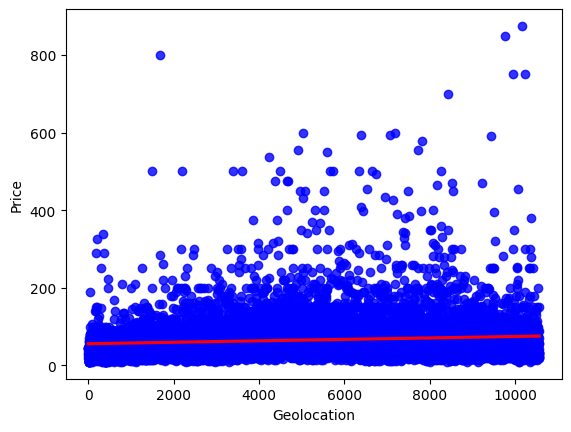

In [5]:
# Con este codigo he mirado las variables que tenia duda de quitarlas, que relacion tiene con el precio
# y me ayuda a decidir que variables me quedo


import seaborn as sns
from sklearn.preprocessing import LabelEncoder

le_Street = LabelEncoder()
data_train['Geolocation'] = le_Street.fit_transform(data_train['Geolocation'])
# sns.regplot(data=data_train, x=variable, y='Price', ci=None, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
sns.regplot(data=data_train,x='Geolocation',y='Price',ci=None, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.xlabel('Geolocation')
plt.ylabel('Price')
plt.show()

In [6]:
# Despues de hacer un estudio del df borro en train, las columnas que creo que no son relevantes o las que afectan poco 
# al precio 
 


data_train = data_train.drop(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description',
                              'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction',
                              'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID',
                              'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Response Time',
                              'Host Response Rate', 'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url', 
                              'Host Neighbourhood', 'Host Listings Count', 'Host Total Listings Count', 'Host Verifications',
                              'Street', 'Neighbourhood', 'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
                              'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude', 'Amenities', 'Square Feet',
                              'Weekly Price', 'Monthly Price', 'Security Deposit', 'Maximum Nights',
                              'Calendar Updated', 'Has Availability', 'Availability 30', 'Availability 60', 'Availability 90',
                              'Availability 365', 'Calendar last Scraped', 'Number of Reviews', 'First Review', 'Last Review',
                              'Review Scores Accuracy','Review Scores Checkin', 'Review Scores Communication', 
                              'Review Scores Value', 'License', 'Jurisdiction Names', 'Calculated host listings count',
                              'Reviews per Month', 'Geolocation', 'Features'],axis=1)


# Codifico las variables categoricas con labelEncoder

from sklearn.preprocessing import LabelEncoder

le_Neighbourhood_Cleansed = LabelEncoder()
le_Property_Type = LabelEncoder()
le_Room_Type = LabelEncoder()
le_Bed_Type = LabelEncoder()
le_Cancellation_Policy = LabelEncoder()

data_train['Neighbourhood Cleansed'] = le_Neighbourhood_Cleansed.fit_transform(data_train['Neighbourhood Cleansed'])
data_train['Property Type'] = le_Property_Type.fit_transform(data_train['Property Type'])
data_train['Room Type'] = le_Room_Type.fit_transform(data_train['Room Type'])
data_train['Bed Type'] = le_Bed_Type.fit_transform(data_train['Bed Type'])
data_train['Cancellation Policy'] = le_Cancellation_Policy.fit_transform(data_train['Cancellation Policy'])

<Figure size 200x200 with 0 Axes>

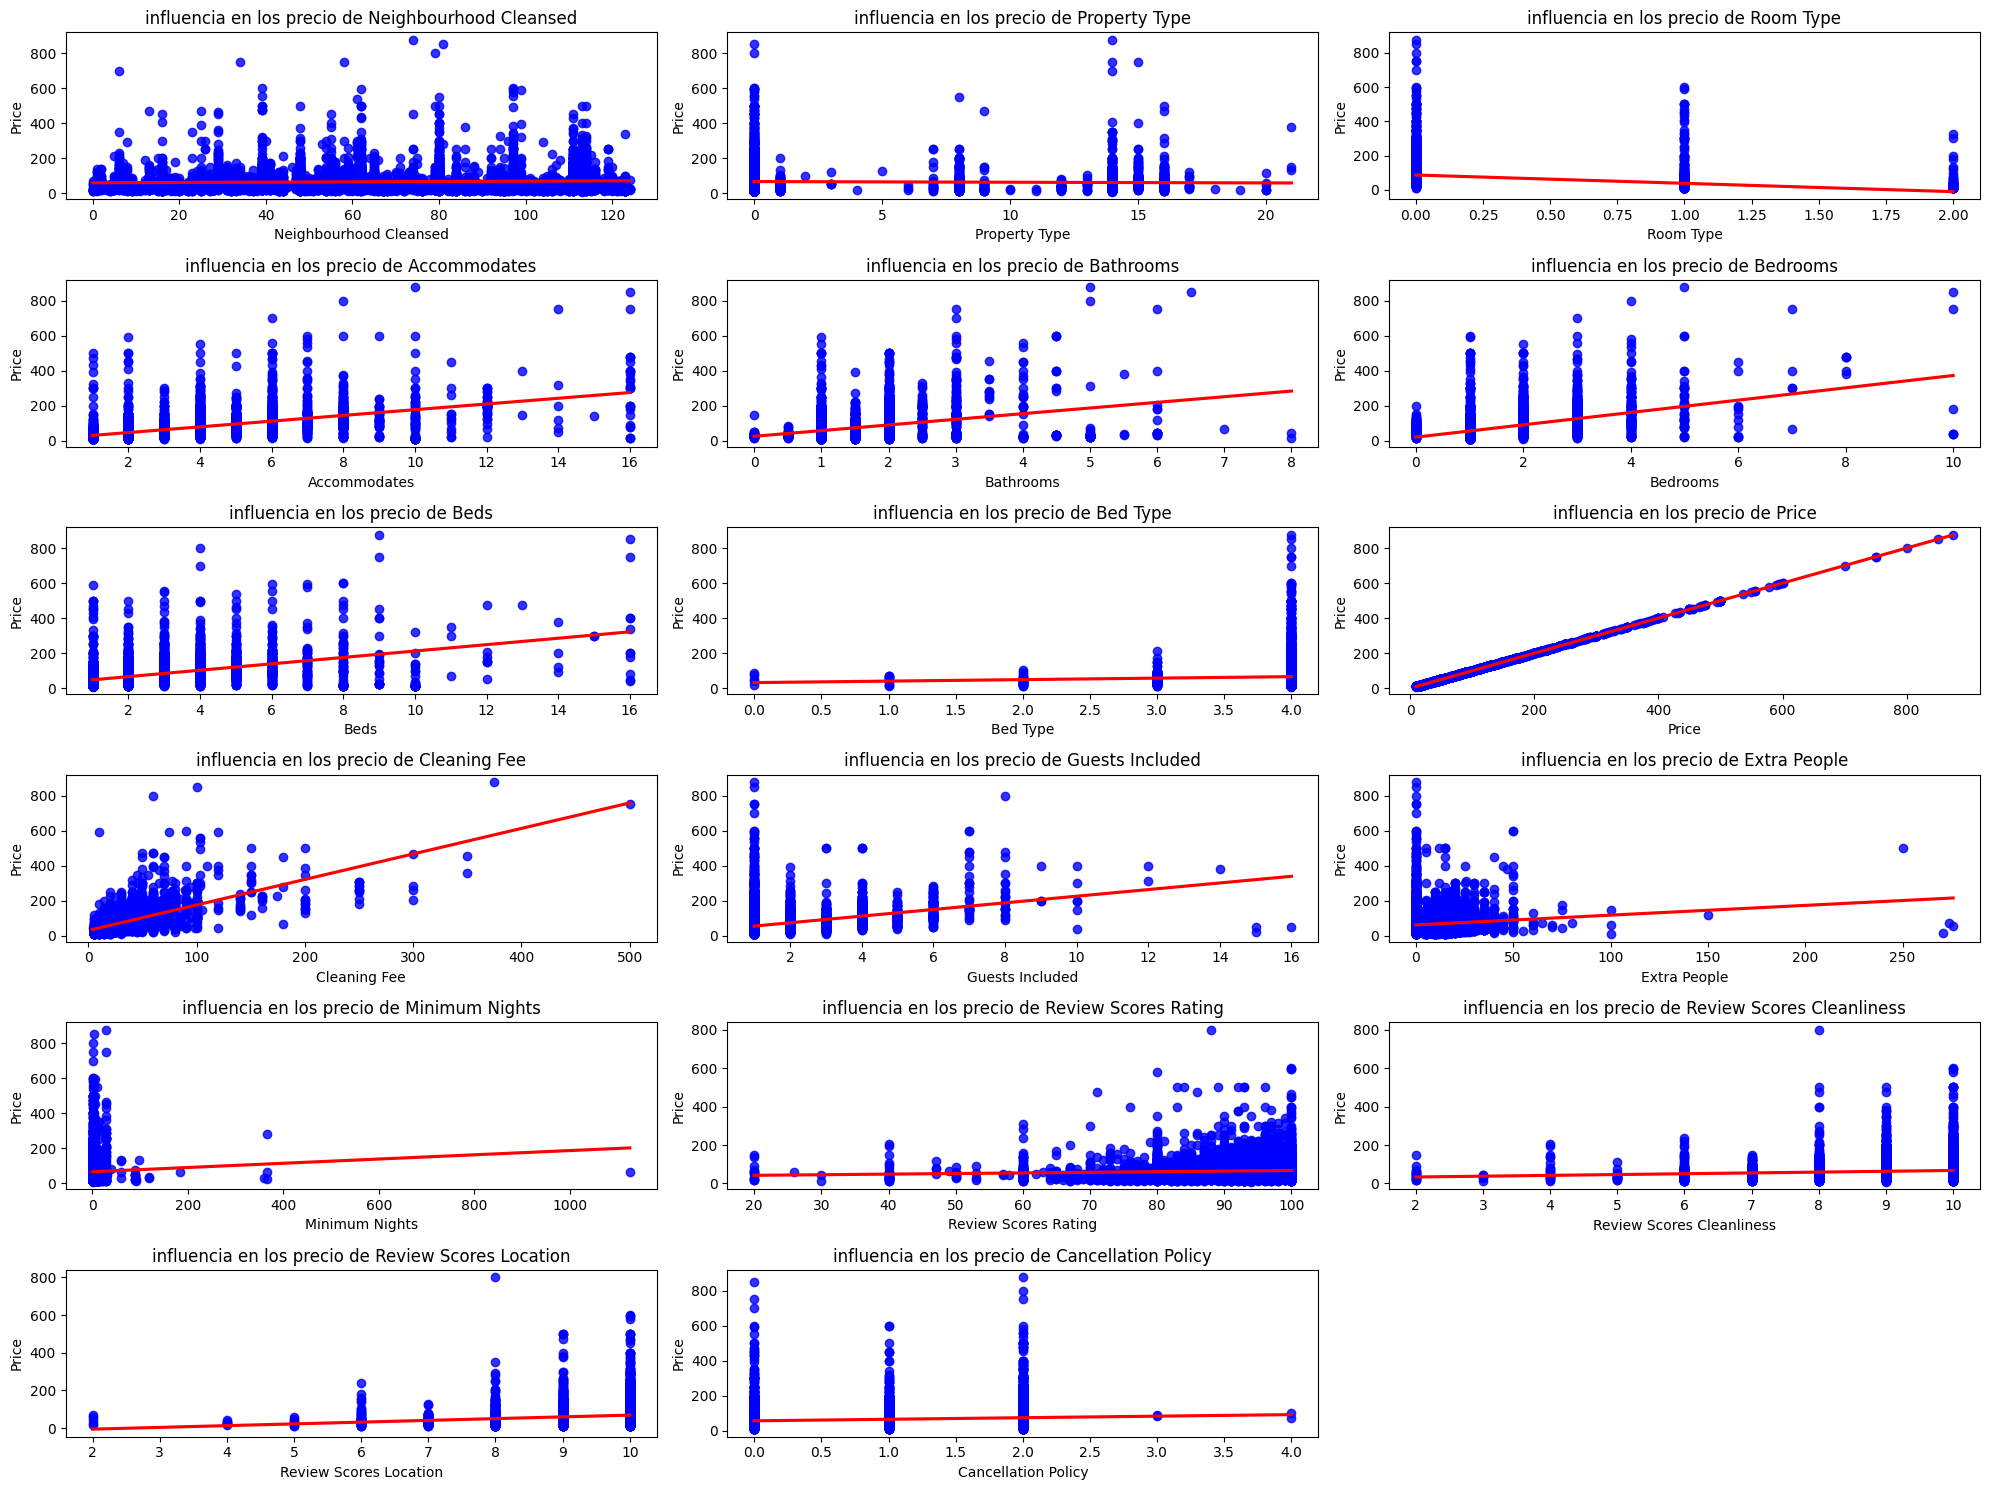

In [7]:
# Miro la relacion de las variables escogidas en relacion al precio


import seaborn as sns
import matplotlib.pyplot as plt


columnas_sel = ['Neighbourhood Cleansed', 'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
                'Beds', 'Bed Type', 'Price', 'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights',
                'Review Scores Rating', 'Review Scores Cleanliness', 'Review Scores Location','Cancellation Policy']


plt.figure(figsize=(2, 2))

# mediante un bucle , visualizo la relacion de cada dimension con el precio

plt.figure(figsize=(20, 15))
for i, variable in enumerate(columnas_sel, 1):
    plt.subplot(6, 3, i)
    sns.regplot(data=data_train, x=variable, y='Price', ci=None, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
    #plt.yscale('log')  # Configurar la escala logarítmica en el eje y
    plt.title(f'influencia en los precio de {variable}')

plt.tight_layout()
plt.show()

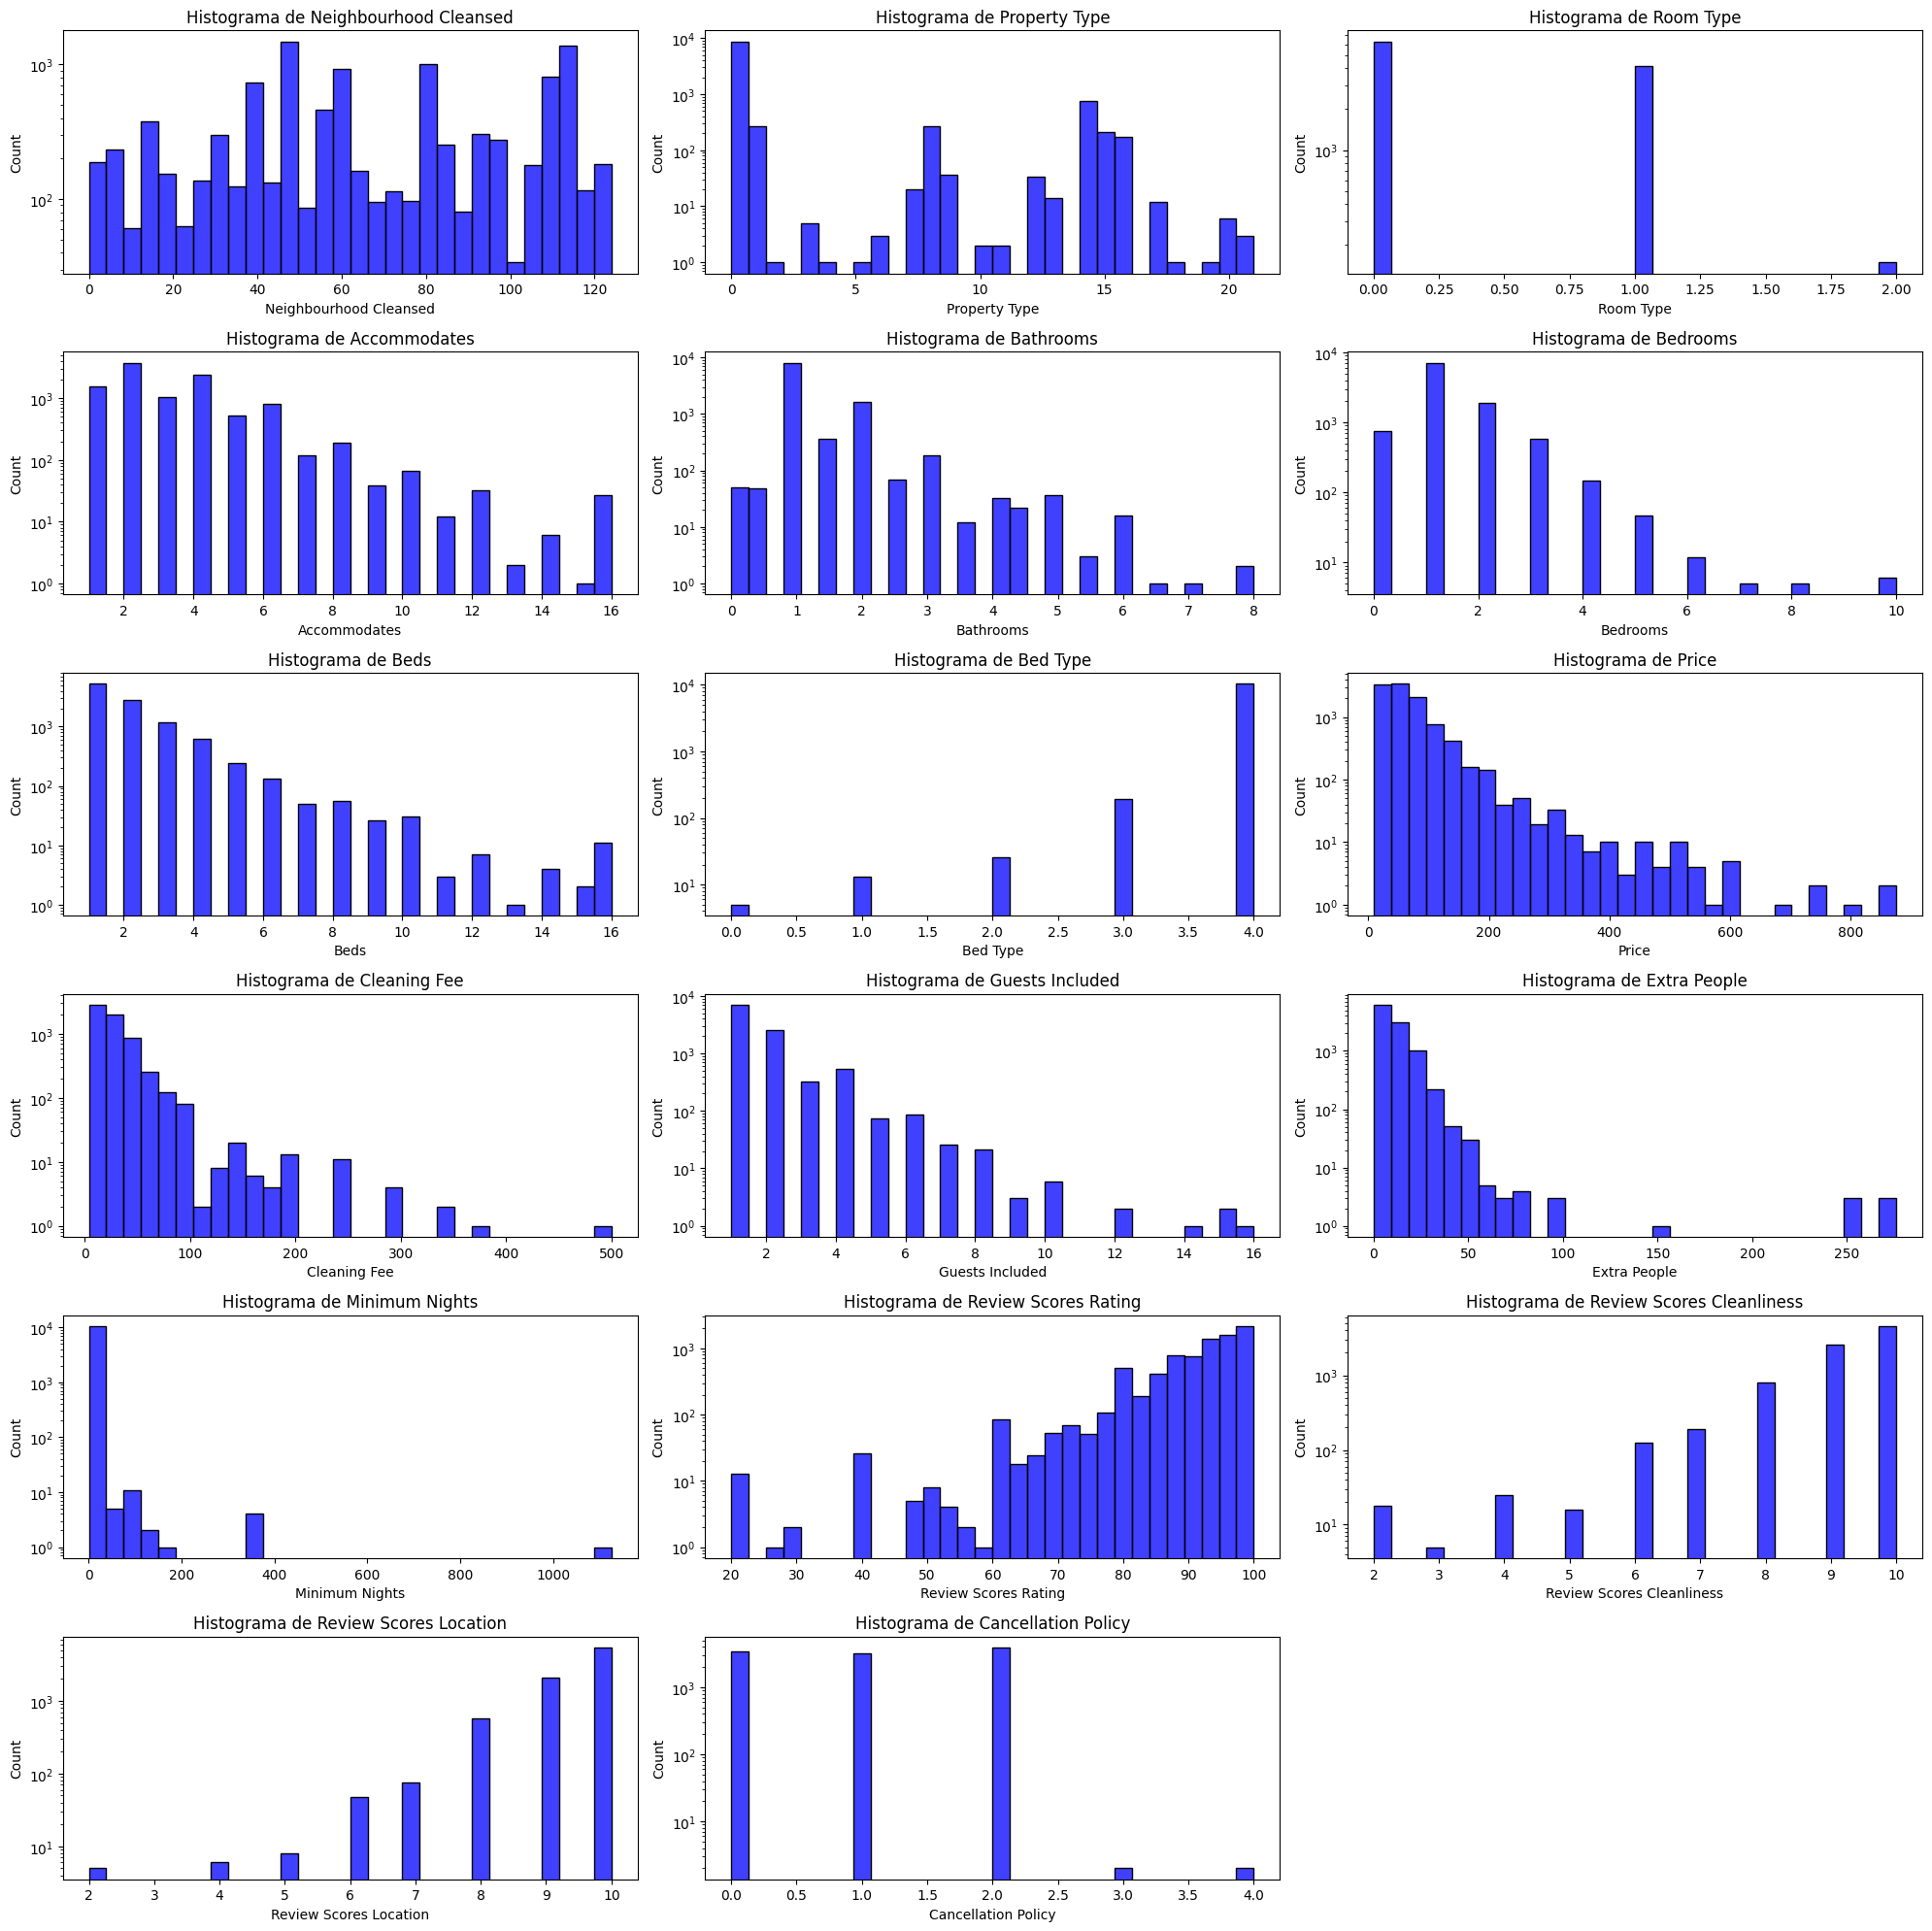

In [8]:
# Hacemos un histograma con todas las variables escogidas para ver la distribucion de los datos y ver posibles outliers

import seaborn as sns
import matplotlib.pyplot as plt


variables = ['Neighbourhood Cleansed', 'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
                'Beds', 'Bed Type', 'Price', 'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights',
                'Review Scores Rating', 'Review Scores Cleanliness', 'Review Scores Location','Cancellation Policy']

# Crear gráficos para las variables 
plt.figure(figsize=(20, 20))
for i, variable in enumerate(variables, 1):
    plt.subplot(6, 3, i)
    sns.histplot(data_train[variable], bins=30, kde=False, color='blue')
    plt.yscale('log') 
    plt.title(f'Histograma de {variable}')

plt.tight_layout()
plt.show()

In [9]:
# Busco los valores nan de las columnas que me quedo

nan_info = data_train.isna().sum()
print(nan_info)

# Voy a calcular la media y la moda de las columnas con nan


columnas_calculo = ['Review Scores Rating', 'Review Scores Cleanliness', 'Review Scores Location',
                  'Bathrooms','Bedrooms','Beds','Price']

media_columnas = data_train[columnas_calculo].mean()
moda_columnas = data_train[columnas_calculo].mode()

print(media_columnas)
print(moda_columnas)

Neighbourhood Cleansed          0
Property Type                   0
Room Type                       0
Accommodates                    0
Bathrooms                      42
Bedrooms                       20
Beds                           43
Bed Type                        0
Price                           7
Cleaning Fee                 4309
Guests Included                 0
Extra People                    0
Minimum Nights                  0
Review Scores Rating         2289
Review Scores Cleanliness    2298
Review Scores Location       2315
Cancellation Policy             0
dtype: int64
Review Scores Rating         91.609836
Review Scores Cleanliness     9.321761
Review Scores Location        9.543273
Bathrooms                     1.253587
Bedrooms                      1.293789
Beds                          1.981753
Price                        65.771832
dtype: float64
   Review Scores Rating  Review Scores Cleanliness  Review Scores Location  \
0                 100.0                    

In [10]:
data_train.dtypes

Neighbourhood Cleansed         int32
Property Type                  int32
Room Type                      int32
Accommodates                   int64
Bathrooms                    float64
Bedrooms                     float64
Beds                         float64
Bed Type                       int32
Price                        float64
Cleaning Fee                 float64
Guests Included                int64
Extra People                   int64
Minimum Nights                 int64
Review Scores Rating         float64
Review Scores Cleanliness    float64
Review Scores Location       float64
Cancellation Policy            int32
dtype: object

In [11]:
# Despues del estudio de influencia en el precio hecho, decido borrar estas columnas porque parece que no afecta
# al precio( grafica plana ):'Property Type','Review Scores Value','Neighbourhood Cleansed'
# Tambien he borrado bed _type porque random forest dice que es una caracteristica que influye muy poco en el modelo


data_train = data_train.drop(['Property Type','Review Scores Rating','Neighbourhood Cleansed',
                              'Bed Type'],axis=1)

# Viendo los resultados de registros nan, voy a imputar los valores nan en la variable Cleaning fee como valores 0 porque 
# tomo esos valores nan como que no tiene tasa de limpieza y probados en randomForest con imputacion 
# de media o 0 me quedo con la imputacion 0 

data_train["Cleaning Fee"].fillna(0, inplace=True)

# Dados los resultados realizados abajo de las medias y las modas, voy a imputar las columnas con las medias

# Imputo a los valores nan con la media obtenida de cada columna

columnas_con_nan = data_train.columns[data_train.isna().any()].tolist()
for i in columnas_con_nan:
    media_columna = data_train[i].mean()
    data_train[i] = data_train[i].fillna(media_columna)
    
    
# Una vez hechas las imputaciones, realizo la separacion entre la columna objetivo y las demas ( X_train, y_train)

features = data_train.drop(['Price'], axis=1).columns

X_train = data_train[features]
y_train = data_train['Price']

In [12]:
X_train.dtypes

Room Type                      int32
Accommodates                   int64
Bathrooms                    float64
Bedrooms                     float64
Beds                         float64
Cleaning Fee                 float64
Guests Included                int64
Extra People                   int64
Minimum Nights                 int64
Review Scores Cleanliness    float64
Review Scores Location       float64
Cancellation Policy            int32
dtype: object

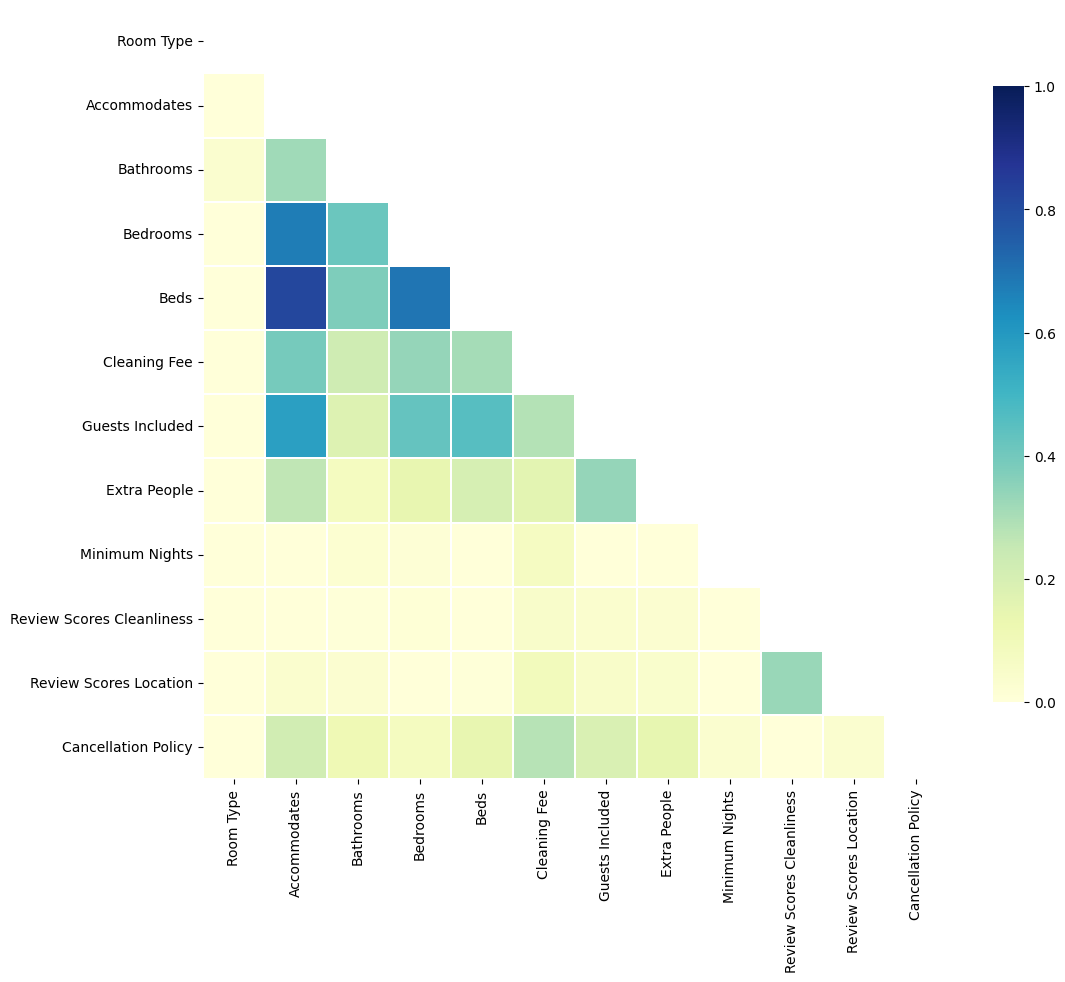

In [13]:
# hago una correlacion de variables para ver su relacion

import seaborn as sns

# Compute the correlation matrix
corr = np.abs(X_train).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [14]:
# hago lo mismo que he hecho en los datos train , en los datos de test
 


data_test = data_test.drop(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description',
                              'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction',
                              'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID',
                              'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Response Time',
                              'Host Response Rate', 'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url', 
                              'Host Neighbourhood', 'Host Listings Count', 'Host Total Listings Count', 'Host Verifications',
                              'Street', 'Neighbourhood', 'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
                              'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude', 'Amenities', 'Square Feet',
                              'Weekly Price', 'Monthly Price', 'Security Deposit', 'Maximum Nights',
                              'Calendar Updated', 'Has Availability', 'Availability 30', 'Availability 60', 'Availability 90',
                              'Availability 365', 'Calendar last Scraped', 'Number of Reviews', 'First Review', 'Last Review',
                              'Review Scores Accuracy','Review Scores Checkin', 'Review Scores Communication', 
                              'Review Scores Value', 'License', 'Jurisdiction Names', 'Calculated host listings count',
                              'Reviews per Month', 'Geolocation', 'Features'],axis=1)


# Codifico las variables categoricas con labelEncoder

from sklearn.preprocessing import LabelEncoder

le_Neighbourhood_Cleansed = LabelEncoder()
le_Property_Type = LabelEncoder()
le_Room_Type = LabelEncoder()
le_Bed_Type = LabelEncoder()
le_Cancellation_Policy = LabelEncoder()

data_test['Neighbourhood Cleansed'] = le_Neighbourhood_Cleansed.fit_transform(data_test['Neighbourhood Cleansed'])
data_test['Property Type'] = le_Property_Type.fit_transform(data_test['Property Type'])
data_test['Room Type'] = le_Room_Type.fit_transform(data_test['Room Type'])
data_test['Bed Type'] = le_Bed_Type.fit_transform(data_test['Bed Type'])
data_test['Cancellation Policy'] = le_Cancellation_Policy.fit_transform(data_test['Cancellation Policy'])

# Borro 'Property Type','Review Scores Value','Neighbourhood Cleansed'

data_test = data_test.drop(['Property Type','Review Scores Rating','Neighbourhood Cleansed',
                              'Bed Type'],axis=1)

# voy a imputar los valores nan en la variable Cleaning fee como valores 0 

data_test["Cleaning Fee"].fillna(0, inplace=True)

# Dados los resultados realizados abajo de las medias y las modas, voy a imputar las columnas con las medias
# Imputo a los valores nan con la media obtenida de cada columna

columnas_con_nan = data_test.columns[data_test.isna().any()].tolist()
for i in columnas_con_nan:
    media_columna = data_test[i].mean()
    data_test[i] = data_test[i].fillna(media_columna)
    
    
# Una vez hechas las imputaciones, realizo la separacion entre la columna objetivo y las demas ( X_test, y_test)

features = data_test.drop(['Price'], axis=1).columns

X_test = data_test[features]
y_test = data_test['Price']

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# preparamos los datos


X_train = X_train.values
y_train = y_train.values

X_test = X_test.values
y_test = y_test.values



scaler = StandardScaler().fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test  = scaler.transform(X_test)

In [16]:
print(Xs_train.shape)
print(Xs_test.shape)
print(y_train.shape)
print(y_test.shape)

(10565, 12)
(2642, 12)
(10565,)
(2642,)


# Una vez probados los modelos , decido quedarme con random forest

Fitting 5 folds for each of 13 candidates, totalling 65 fits
[CV] END ........................................max_depth=1; total time=   0.1s
[CV] END ........................................max_depth=1; total time=   0.1s
[CV] END ........................................max_depth=1; total time=   0.1s
[CV] END ........................................max_depth=1; total time=   0.1s
[CV] END ........................................max_depth=1; total time=   0.1s
[CV] END ........................................max_depth=2; total time=   0.1s
[CV] END ........................................max_depth=2; total time=   0.1s
[CV] END ........................................max_depth=2; total time=   0.1s
[CV] END ........................................max_depth=2; total time=   0.1s
[CV] END ........................................max_depth=2; total time=   0.1s
[CV] END ........................................max_depth=3; total time=   0.1s
[CV] END .......................................

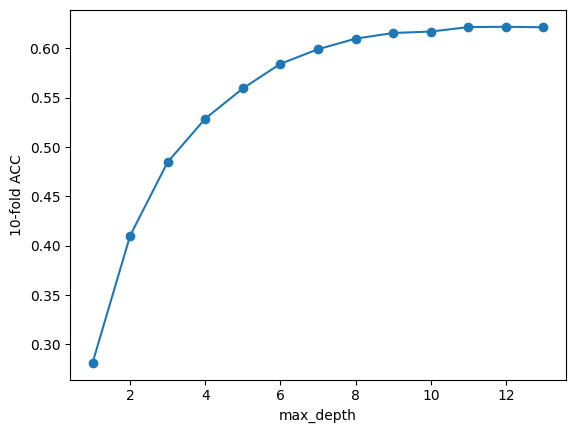

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

maxDepth = range(1,14)
tuned_parameters = {'max_depth': maxDepth}
samples_leaf = [1,0.1,0.01]
grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=5, verbose=2) 
grid.fit(Xs_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [18]:
maxDepthOptimo = grid.best_params_['max_depth']
randomForest = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(Xs_train,y_train)
y_train_preRF = randomForest.predict(Xs_train)
y_test_preRF = randomForest.predict(Xs_test)

print(f'MSE train: {np.sqrt(mean_squared_error(y_train,y_train_preRF))}')
print(f'MSE test: {np.sqrt(mean_squared_error(y_test,y_test_preRF))}')
print("Train: ",randomForest.score(Xs_train,y_train))
print("Test: ",randomForest.score(Xs_test,y_test))

MSE train: 25.746010257153085
MSE test: 31.54762072195943
Train:  0.7910702791664737
Test:  0.6662425620836473


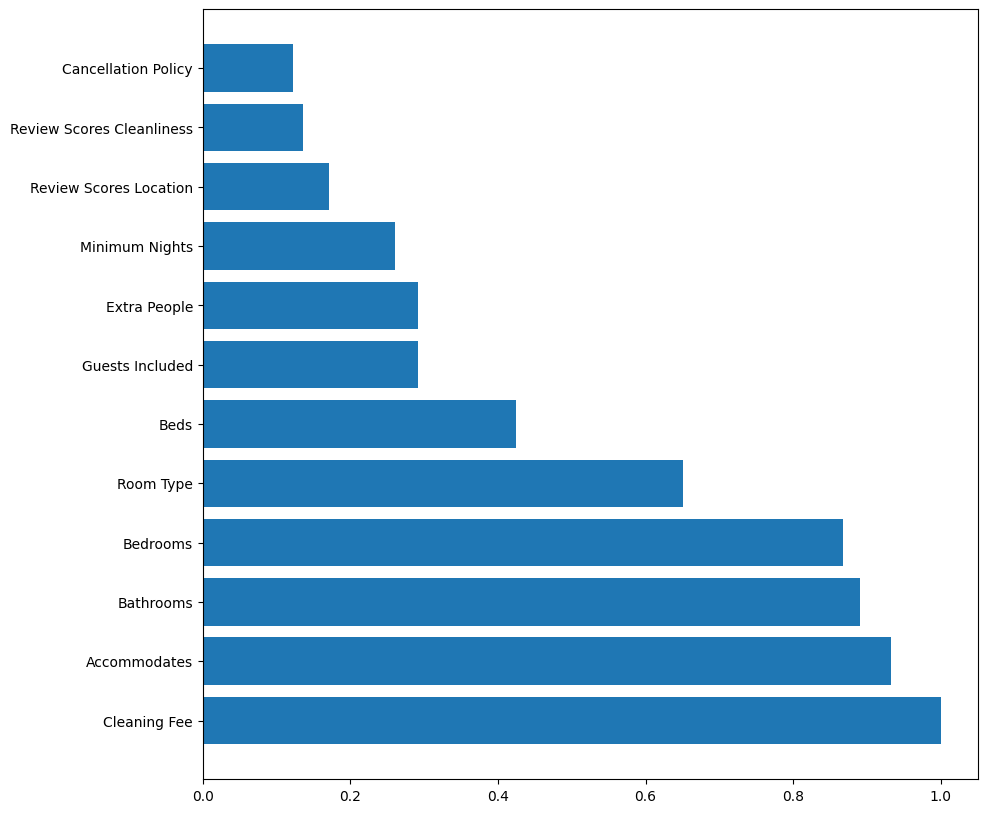

In [19]:
importances = randomForest.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(Xs_train.shape[1]),importances[indices])
plt.yticks(range(Xs_train.shape[1]),features[indices])
plt.show()

In [20]:
for i in range (6,14):
    randomForest = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(Xs_train,y_train)
    print(f'{i}.train:{randomForest.score(Xs_train,y_train)}.test:{randomForest.score(Xs_test,y_test)}')

6.train:0.7903764487449896.test:0.6616526002291063
7.train:0.7904997572203538.test:0.6610961850884989
8.train:0.7913706689431799.test:0.6655327737432384
9.train:0.7887087317531054.test:0.6644140996418646
10.train:0.7895357337592569.test:0.6671251259707616
11.train:0.7921358966893792.test:0.6650778787187661
12.train:0.789578675504264.test:0.6641106737230504
13.train:0.7904921369894679.test:0.6652332183033688


## despues de hacer variciones en el modelo random forest y quitando  variables 
## que afectan menos y haciendo pruebas, mi modelo el siguiente

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

maxDepth = [12]
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=5) 
grid.fit(Xs_train, y_train)

maxDepthOptimo = grid.best_params_['max_depth']
randomForest = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(Xs_train,y_train)
y_train_preRF = randomForest.predict(Xs_train)
y_test_preRF = randomForest.predict(Xs_test)

print(f'MSE train: {np.sqrt(mean_squared_error(y_train,y_train_preRF))}')
print(f'MSE test: {np.sqrt(mean_squared_error(y_test,y_test_preRF))}')
print("Train: ",randomForest.score(Xs_train,y_train))
print("Test: ",randomForest.score(Xs_test,y_test))


MSE train: 25.740629688303454
MSE test: 31.61192444997417
Train:  0.7911575970280946
Test:  0.6648805753516365


#### conclusiones del modelo:

El error en el modelo aunque no se ajusta mucho es un modelo con una capacidad de prediccion suficiente para realizar un prediccion razonable sobre datos nuevos. Tiene 0,66 de coeficiente que hace que sea un coeficiente discreto pero no del todo malo para datos nuevos

Existe una diferencia entre el rendimiento en el conjunto de entrenamiento y el conjunto de prueba, pero las diferencias no son muy grandes. Los datos son ligeramente mejores en el conjunto de entrenamiento, lo que podría sugerir cierto grado de overfitting. Sin embargo, las diferencias no son excesivas, y el modelo generaliza razonablemente bien a nuevos datos.
Los datos en el conjunto de train indica que el modelo se ajusta mas o menos bien a esos datos pero hay diferencia con los datos test pero es una diferencia moderada
El modelo parece estar dando un funcionando relativamente bien pero se deberia ajustar mas para mejorar los resultados pero parece que generaliza medio bien 


# prueba los modelos para los datos

# regresion lineal

In [22]:
# hago ridge
'''
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression 

# Rango de valores para alpha en escala logarítmica
alpha_vector = np.logspace(-3, 3, 25)

# Configuración de parámetros y búsqueda de hiperparámetros
param_grid = {'alpha': alpha_vector}
ridge_model = Ridge()
grid = GridSearchCV(ridge_model, scoring='neg_mean_squared_error', param_grid=param_grid, cv=5)
grid.fit(Xs_train, y_train)

# Mejor hiperparámetro encontrado
mejor_alpha = grid.best_params_['alpha']
print("Mejor hiperparámetro (alpha):", mejor_alpha)

'''

'\nfrom sklearn.linear_model import Ridge\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.metrics import mean_squared_error\nfrom sklearn.linear_model import LinearRegression \n\n# Rango de valores para alpha en escala logarítmica\nalpha_vector = np.logspace(-3, 3, 25)\n\n# Configuración de parámetros y búsqueda de hiperparámetros\nparam_grid = {\'alpha\': alpha_vector}\nridge_model = Ridge()\ngrid = GridSearchCV(ridge_model, scoring=\'neg_mean_squared_error\', param_grid=param_grid, cv=5)\ngrid.fit(Xs_train, y_train)\n\n# Mejor hiperparámetro encontrado\nmejor_alpha = grid.best_params_[\'alpha\']\nprint("Mejor hiperparámetro (alpha):", mejor_alpha)\n\n'

In [23]:
'''

alpha_optimo = grid.best_params_['alpha']
ridge = Ridge(alpha = alpha_optimo).fit(X_train,y_train)  # Equivalente a grid.best_estimator_

# predicción
y_pred = ridge.predict(X_test)

w = ridge.coef_
norm_w2 = np.dot(w,w.T)

# error
#error_test = np.mean(np.power(y_test - y_hat,2)) 

mse = mean_squared_error(y_test, y_pred)

print("Error cuadrático medio en conjunto de prueba:", mse)
print(f'MSE test: {np.sqrt(mse)}')
print("Score en train :", ridge.score(X_train,y_train))
print("Score en test :", ridge.score(X_test,y_test))
'''

'\n\nalpha_optimo = grid.best_params_[\'alpha\']\nridge = Ridge(alpha = alpha_optimo).fit(X_train,y_train)  # Equivalente a grid.best_estimator_\n\n# predicción\ny_pred = ridge.predict(X_test)\n\nw = ridge.coef_\nnorm_w2 = np.dot(w,w.T)\n\n# error\n#error_test = np.mean(np.power(y_test - y_hat,2)) \n\nmse = mean_squared_error(y_test, y_pred)\n\nprint("Error cuadrático medio en conjunto de prueba:", mse)\nprint(f\'MSE test: {np.sqrt(mse)}\')\nprint("Score en train :", ridge.score(X_train,y_train))\nprint("Score en test :", ridge.score(X_test,y_test))\n'

In [24]:
# hago lasso
'''
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Rango de valores para alpha en escala logarítmica
alpha_vector = np.logspace(-3, 3, 25)

# Configuración de parámetros y búsqueda de hiperparámetros
param_grid = {'alpha': alpha_vector}
lasso_model = Lasso()
grid = GridSearchCV(lasso_model, scoring='neg_mean_squared_error', param_grid=param_grid, cv=5)
grid.fit(Xs_train, y_train)

# Mejor hiperparámetro encontrado
mejor_alpha = grid.best_params_['alpha']
print("Mejor hiperparámetro (alpha):", mejor_alpha)
'''

'\nfrom sklearn.linear_model import Lasso\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.metrics import mean_squared_error\n\n# Rango de valores para alpha en escala logarítmica\nalpha_vector = np.logspace(-3, 3, 25)\n\n# Configuración de parámetros y búsqueda de hiperparámetros\nparam_grid = {\'alpha\': alpha_vector}\nlasso_model = Lasso()\ngrid = GridSearchCV(lasso_model, scoring=\'neg_mean_squared_error\', param_grid=param_grid, cv=5)\ngrid.fit(Xs_train, y_train)\n\n# Mejor hiperparámetro encontrado\nmejor_alpha = grid.best_params_[\'alpha\']\nprint("Mejor hiperparámetro (alpha):", mejor_alpha)\n'

In [25]:
'''

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(X_train,y_train)  # Equivalente a grid.best_estimator_

# predicción
y_pred = lasso.predict(X_test)

w = lasso.coef_
norm_w2 = np.dot(w,w.T)

# error
#error_test = np.mean(np.power(y_test - y_hat,2)) 

mse = mean_squared_error(y_test, y_pred)

print("Error cuadrático medio en conjunto de prueba:", mse)
print(f'MSE test: {np.sqrt(mse)}')
print("Score en train :", lasso.score(X_train,y_train))
print("Score en test :", lasso.score(X_test,y_test))
'''

'\n\nalpha_optimo = grid.best_params_[\'alpha\']\nlasso = Lasso(alpha = alpha_optimo).fit(X_train,y_train)  # Equivalente a grid.best_estimator_\n\n# predicción\ny_pred = lasso.predict(X_test)\n\nw = lasso.coef_\nnorm_w2 = np.dot(w,w.T)\n\n# error\n#error_test = np.mean(np.power(y_test - y_hat,2)) \n\nmse = mean_squared_error(y_test, y_pred)\n\nprint("Error cuadrático medio en conjunto de prueba:", mse)\nprint(f\'MSE test: {np.sqrt(mse)}\')\nprint("Score en train :", lasso.score(X_train,y_train))\nprint("Score en test :", lasso.score(X_test,y_test))\n'

# regresion polinomica

In [26]:
# Hago una regresion polinomica a ver que resultados obtengo
'''
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
degree = 1
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(Xs_train)
X_test_poly = poly.fit_transform(Xs_test)

lr = LinearRegression() 
lr.fit(X_train_poly,y_train)
y_train_pred = lr.predict(X_train_poly)
y_test_pred = lr.predict(X_test_poly)

print(f'MSE train: {np.sqrt(mean_squared_error(y_train,y_train_pred))}')
print(f'MSE test: {np.sqrt(mean_squared_error(y_test,y_test_pred))}')
print("Score en train :", lr.score(X_train_poly,y_train))
print("Score en test :", lr.score(X_test_poly,y_test))
'''

'\nfrom sklearn.preprocessing import PolynomialFeatures\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.metrics import mean_squared_error\ndegree = 1\npoly = PolynomialFeatures(degree)\nX_train_poly = poly.fit_transform(Xs_train)\nX_test_poly = poly.fit_transform(Xs_test)\n\nlr = LinearRegression() \nlr.fit(X_train_poly,y_train)\ny_train_pred = lr.predict(X_train_poly)\ny_test_pred = lr.predict(X_test_poly)\n\nprint(f\'MSE train: {np.sqrt(mean_squared_error(y_train,y_train_pred))}\')\nprint(f\'MSE test: {np.sqrt(mean_squared_error(y_test,y_test_pred))}\')\nprint("Score en train :", lr.score(X_train_poly,y_train))\nprint("Score en test :", lr.score(X_test_poly,y_test))\n'

# DecisionTree

In [27]:

'''
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV
maxDepth = range(1,15)
tuned_parameters = {'base_estimator__max_depth': maxDepth}

grid = GridSearchCV(BaggingRegressor(base_estimator=DecisionTreeRegressor(), random_state=0, n_estimators=200), param_grid=tuned_parameters,cv=7, verbose=2) 
grid.fit(Xs_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()
'''

'\nfrom sklearn.tree import DecisionTreeRegressor\nfrom sklearn.ensemble import BaggingRegressor\nfrom sklearn.model_selection import GridSearchCV\nmaxDepth = range(1,15)\ntuned_parameters = {\'base_estimator__max_depth\': maxDepth}\n\ngrid = GridSearchCV(BaggingRegressor(base_estimator=DecisionTreeRegressor(), random_state=0, n_estimators=200), param_grid=tuned_parameters,cv=7, verbose=2) \ngrid.fit(Xs_train, y_train)\n\nprint("best mean cross-validation score: {:.3f}".format(grid.best_score_))\nprint("best parameters: {}".format(grid.best_params_))\n\nscores = np.array(grid.cv_results_[\'mean_test_score\'])\nplt.plot(maxDepth,scores,\'-o\')\nplt.xlabel(\'max_depth\')\nplt.ylabel(\'10-fold ACC\')\n\nplt.show()\n'

In [28]:
'''
maxDepthOptimo = grid.best_params_['base_estimator__max_depth']
treeModel = DecisionTreeRegressor(max_depth=maxDepthOptimo).fit(X_train,y_train)

print("Train: ",treeModel.score(X_train,y_train))
print("Test: ",treeModel.score(X_test,y_test))
'''

'\nmaxDepthOptimo = grid.best_params_[\'base_estimator__max_depth\']\ntreeModel = DecisionTreeRegressor(max_depth=maxDepthOptimo).fit(X_train,y_train)\n\nprint("Train: ",treeModel.score(X_train,y_train))\nprint("Test: ",treeModel.score(X_test,y_test))\n'

# randomforest

In [29]:
'''
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

maxDepth = range(1,14)
tuned_parameters = {'max_depth': maxDepth}
samples_leaf = [1,0.1,0.01]
grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=3, verbose=2) 
grid.fit(Xs_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()
'''

'\nfrom sklearn.ensemble import RandomForestRegressor\nfrom sklearn.model_selection import GridSearchCV\n\nmaxDepth = range(1,14)\ntuned_parameters = {\'max_depth\': maxDepth}\nsamples_leaf = [1,0.1,0.01]\ngrid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features=\'sqrt\'), param_grid=tuned_parameters,cv=3, verbose=2) \ngrid.fit(Xs_train, y_train)\n\nprint("best mean cross-validation score: {:.3f}".format(grid.best_score_))\nprint("best parameters: {}".format(grid.best_params_))\n\nscores = np.array(grid.cv_results_[\'mean_test_score\'])\nplt.plot(maxDepth,scores,\'-o\')\nplt.xlabel(\'max_depth\')\nplt.ylabel(\'10-fold ACC\')\n\nplt.show()\n'

In [30]:
'''

maxDepthOptimo = grid.best_params_['max_depth']
randomForest = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(Xs_train,y_train)
y_train_preRF = randomForest.predict(Xs_train)
y_test_preRF = randomForest.predict(Xs_test)

print(f'MSE train: {np.sqrt(mean_squared_error(y_train,y_train_preRF))}')
print(f'MSE test: {np.sqrt(mean_squared_error(y_test,y_test_preRF))}')
print("Train: ",randomForest.score(Xs_train,y_train))
print("Test: ",randomForest.score(Xs_test,y_test))
'''

'\n\nmaxDepthOptimo = grid.best_params_[\'max_depth\']\nrandomForest = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features=\'sqrt\').fit(Xs_train,y_train)\ny_train_preRF = randomForest.predict(Xs_train)\ny_test_preRF = randomForest.predict(Xs_test)\n\nprint(f\'MSE train: {np.sqrt(mean_squared_error(y_train,y_train_preRF))}\')\nprint(f\'MSE test: {np.sqrt(mean_squared_error(y_test,y_test_preRF))}\')\nprint("Train: ",randomForest.score(Xs_train,y_train))\nprint("Test: ",randomForest.score(Xs_test,y_test))\n'

In [31]:
'''

importances = randomForest.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(Xs_train.shape[1]),importances[indices])
plt.yticks(range(Xs_train.shape[1]),features[indices])
plt.show()
'''

'\n\nimportances = randomForest.feature_importances_\nimportances = importances / np.max(importances)\n\nindices = np.argsort(importances)[::-1]\n\nplt.figure(figsize=(10,10))\nplt.barh(range(Xs_train.shape[1]),importances[indices])\nplt.yticks(range(Xs_train.shape[1]),features[indices])\nplt.show()\n'

In [32]:
'''

for i in range (6,14):
    randomForest = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(Xs_train,y_train)
    print(f'{i}.train:{randomForest.score(Xs_train,y_train)}.test:{randomForest.score(Xs_test,y_test)}')
'''

"\n\nfor i in range (6,14):\n    randomForest = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(Xs_train,y_train)\n    print(f'{i}.train:{randomForest.score(Xs_train,y_train)}.test:{randomForest.score(Xs_test,y_test)}')\n"

# svr

In [33]:
'''

from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Normalizar los datos de entrenamiento
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)

# Normalizar los datos test
X_test_normalized = scaler.transform(X_test)

# Modelo SVM
svr = SVR(kernel='rbf')  # Puedes ajustar otros parámetros según tus necesidades

# Entrenar el modelo
svr.fit(X_train_normalized, y_train)
y_pred_normalized = svr.predict(X_test_normalized)

# Calcular el error cuadrático medio
mse_normalized = mean_squared_error(y_test, y_pred_normalized)
# Predicción en el conjunto de prueba
y_pred = svr.predict(X_test_normalized)

# Calcular el error cuadrático medio
#mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
score_train = svr.score(X_train_normalized, y_train)
score_test = svr.score(X_test_normalized, y_test)

print(f'Score en el conjunto de prueba: {score_test}')
print(f'Score en el conjunto de entrenamiento: {score_train}')


# Representar gráficamente los resultados
plt.scatter(X_test[:, 0], y_test, color='black', label='Real')
plt.scatter(X_test[:, 0], y_pred, color='red', label='Predicción')
plt.title('SVR - Predicción vs Realidad')
plt.xlabel('Variable Objetivo')  # Ajusta según tus datos
plt.ylabel('Característica 1')
plt.legend()
plt.show()
'''

"\n\nfrom sklearn.svm import SVR\nimport numpy as np\nimport matplotlib.pyplot as plt\nfrom sklearn.metrics import mean_squared_error\nfrom sklearn.preprocessing import StandardScaler\n\n# Normalizar los datos de entrenamiento\nscaler = StandardScaler()\nX_train_normalized = scaler.fit_transform(X_train)\n\n# Normalizar los datos test\nX_test_normalized = scaler.transform(X_test)\n\n# Modelo SVM\nsvr = SVR(kernel='rbf')  # Puedes ajustar otros parámetros según tus necesidades\n\n# Entrenar el modelo\nsvr.fit(X_train_normalized, y_train)\ny_pred_normalized = svr.predict(X_test_normalized)\n\n# Calcular el error cuadrático medio\nmse_normalized = mean_squared_error(y_test, y_pred_normalized)\n# Predicción en el conjunto de prueba\ny_pred = svr.predict(X_test_normalized)\n\n# Calcular el error cuadrático medio\n#mse = mean_squared_error(y_test, y_pred)\nprint(f'Mean Squared Error: {mse}')\nscore_train = svr.score(X_train_normalized, y_train)\nscore_test = svr.score(X_test_normalized, y_te

# boosting

In [34]:
'''
from sklearn.ensemble import GradientBoostingRegressor

Niterations = [500,1000,1500,2000]
learningRate = [0.1,0.05]
# mantenemos max_depth estático: max_depth=3

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3), param_grid=param_grid, cv = 5,verbose=2)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
'''

'\nfrom sklearn.ensemble import GradientBoostingRegressor\n\nNiterations = [500,1000,1500,2000]\nlearningRate = [0.1,0.05]\n# mantenemos max_depth estático: max_depth=3\n\nparam_grid = {\'n_estimators\': Niterations,\'learning_rate\':learningRate }\ngrid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3), param_grid=param_grid, cv = 5,verbose=2)\ngrid.fit(X_train, y_train)\nprint("best mean cross-validation score: {:.3f}".format(grid.best_score_))\nprint("best parameters: {}".format(grid.best_params_))\n'

In [35]:
'''
lrOptimo = grid.best_params_['learning_rate']
neOptimo = grid.best_params_['n_estimators']
bt = GradientBoostingRegressor(random_state=0, max_depth=3,learning_rate=lrOptimo, n_estimators=neOptimo)
bt.fit(X_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()
'''

"\nlrOptimo = grid.best_params_['learning_rate']\nneOptimo = grid.best_params_['n_estimators']\nbt = GradientBoostingRegressor(random_state=0, max_depth=3,learning_rate=lrOptimo, n_estimators=neOptimo)\nbt.fit(X_train,y_train)\n\nerror = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))\ncolors = ['r','b']\nfor i,lr in enumerate(learningRate):    \n    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)\n\nplt.legend()\nplt.xlabel('# iteraciones')\nplt.ylabel('5-fold CV Error')\nplt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))\nplt.grid()\nplt.show()\n"